**Exercise 4: Neural Networks Learning**

In [6]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import scipy
from random import randint
from scipy.io import loadmat
from scipy.optimize import minimize
from sklearn.preprocessing import normalize
from math import sqrt
from __future__ import division
import seaborn as sns
import warnings

['y', 'X', '__version__', '__header__', '__globals__']
['Theta2', '__version__', '__header__', 'Theta1', '__globals__']

Random sample


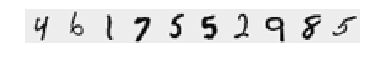

In [7]:
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style("darkgrid")

data = loadmat('ex4data1.mat')
weights = loadmat('ex4weights.mat')
print data.keys()
print weights.keys()
X = data['X']
y = data['y']
Theta1 = weights['Theta1']
Theta2 = weights['Theta2']

rand = randint(0, 5000)
sample = X[np.random.choice(X.shape[0], 10, replace=False), :]

print '\nRandom sample'
plt.imshow(sample.reshape((-1, 20)).T, cmap='gray_r')
plt.axis('off')
plt.show()

**Sigmoid and Sigmoid Gradient Functions**

At 0 sigmoid gradient is 0.25



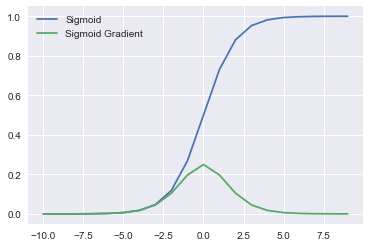

In [8]:
# Sigmoid function
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_gradient(z):
    return sigmoid(z)*(1- sigmoid(z))

Xaxis = np.arange(-10, 10)

print 'At 0 sigmoid gradient is', sigmoid_gradient(0)
print ''

plt.plot(Xaxis, sigmoid(Xaxis), label='Sigmoid')
plt.plot(Xaxis, sigmoid_gradient(Xaxis), label='Sigmoid Gradient')
plt.legend()
plt.show()

**Get the numerical gradient (for checking how well back propagation is working)**

In [9]:
def computeNumericalGradient(J, params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    e = 1e-4
    perturb = np.zeros((params.shape[0], params.shape[0]))
    perturb[np.arange(params.shape[0]), np.arange(params.shape[0])] = e
    
    loss1 = np.zeros(params.shape)
    loss2 = np.zeros(params.shape)
    
    for i in range(params.shape[0]):
        loss1[i] = J(params - perturb[i], input_layer_size, hidden_layer_size, num_labels, X, y, lamb)[0]
        loss2[i] = J(params + perturb[i], input_layer_size, hidden_layer_size, num_labels, X, y, lamb)[0]
    
    return (loss2-loss1)/(2*e)

## Neural Net functions

### randInitializeWeights:
**Params:**
- L_in : size of incoming layer
- L_out: size of outgoing layer

**Returns:**
- numgrad: the numerical gradient


### create_nn_model
**Params:**
- Theta1: Matrix for the first layer
- Theta2: Matrix for the second layer
- X: Input layer

**Return**
- Model(numpy array): array of shape(m, 1) where m is number of rows in X. Every element i in model corresponds to the class predicted for the data in row i in X by the given matrices

### nnCostFunction
**Params:**
- nn_params : 1D vector with parameters for neural net
- input_layer_size: --
- hidden_layer_size: --
- num_labels: number of labels or size of final layer
- X: input data 
- y: classes
- lamb: regularization coefficient

**Returns:**
- J: the cost h0 for the neural net with current parameters
- gradient: from back propagation

In [10]:
def randInitializeWeights(L_in, L_out):
    ep_init = sqrt(6)/sqrt(L_in + L_out)
    
    return np.random.uniform(-ep_init, ep_init, size=(L_out, L_in))
        

def create_nn_model(Theta1, Theta2, X):
    XX = np.append(np.ones((m, 1)), X, axis=1)
    h = sigmoid(Theta1.dot(XX.T))
    l1 = np.append(np.ones((1, h.shape[1])), h, 0)
    h1 = sigmoid(Theta2.dot(l1))
    ans = np.argmax(h1, axis=0) + (np.repeat(1, h1.shape[1]))
    
    return ans

def nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, lamb):
    # Recreate Theta1 and Theta2 (this is straight from the provided Matlab code)
    Theta1 = nn_params[0: hidden_layer_size * (input_layer_size + 1)].reshape(
                 ((hidden_layer_size, (input_layer_size + 1))))

    Theta2 = nn_params[((hidden_layer_size * (input_layer_size + 1))):].reshape(
                     (num_labels, (hidden_layer_size + 1)) )

    m, n = X.shape
    
    Theta1_grad = np.zeros_like(Theta1.shape)
    Theta2_grad = np.zeros_like(Theta2.shape)
    
    
    # One hidden layer
    # Forward feedback through layers
    a1 = np.append(np.ones((m, 1)), X, axis=1)
    a2 = sigmoid(Theta1.dot(a1.T))
    a2_ = np.append(np.ones((1, a2.shape[1])), a2, axis=0)
    a3 = sigmoid(Theta2.dot(a2_))
    
    # Remove 1 from each value in y because python is 0 indexed
    yd = (y - 1)
    
    # Create a Y vector of vectors where each vector has a 1 
    # for the corresponding class in y, else 0
    Y = (np.zeros(a3.shape))
    Y[ yd.ravel(), np.arange(Y.shape[1])] = 1
    
    # Create Thetas without the bias value (Theta0)
    Theta1_0 = np.delete(Theta1, 0, axis=1)
    Theta2_0 = np.delete(Theta2, 0, axis=1)
    
    # Regularized term
    reg = (lamb/(2*m))*(np.sum(np.square(Theta1_0)) + np.sum(np.square(Theta2_0)))
    
    # Cost
    J = (-1/m) * np.sum((np.log(a3)) * Y +  (np.log(1 - a3)) * (1- Y)) + reg
    
    # Back propagation gradient
    delta_3 = (a3 - Y)
    delta_2 = Theta2.T[1:,:].dot(delta_3) * sigmoid_gradient(Theta1.dot(a1.T))
    
    grad_2 = delta_3.dot(a2_.T)/m
    grad_1 = delta_2.dot(a1)/m
    
    if np.isnan(J):
        J = np.inf
        
    return J, np.r_[grad_1.ravel(), grad_2.ravel()]
    
    
    
m, n = X.shape

print 'Theta1\t', Theta1.shape
print 'Theta2\t', Theta2.shape
print 'X\t', X.shape

nn_params = np.r_[Theta1.ravel(), Theta2.ravel()]
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

cost, grad = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 0)
cost1, grad1 = nnCostFunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1)

print '\nCost (lambda = 0)\t', cost
print 'Cost (lambda = 1)\t', cost1
print '\nGradient (lambda = 0)'
print grad
print grad.shape

Theta1	(25, 401)
Theta2	(10, 26)
X	(5000, 400)

Cost (lambda = 0)	0.287629165161
Cost (lambda = 1)	0.383769859091

Gradient (lambda = 0)
[  6.18712766e-05   0.00000000e+00   0.00000000e+00 ...,   9.66104721e-05
  -7.57736846e-04   7.73329872e-04]
(10285,)


**Testing out the quality of back propagation with a limited dataset**

In [11]:
testCost, testGrad = nnCostFunction(
                        nn_params, 
                        input_layer_size, 
                        hidden_layer_size, 
                        num_labels, 
                        X[0:30], y[0:30], 0
                    )

numgrad = computeNumericalGradient(
            nnCostFunction, 
            nn_params, 
            input_layer_size, 
            hidden_layer_size, 
            num_labels, 
            X[0:30], 
            y[0:30], 
            0)


diff = np.linalg.norm(numgrad.ravel() - testGrad.ravel()) / np.linalg.norm(numgrad.ravel() + testGrad.ravel())
print 'Difference is: ' + str(diff)

Difference is: 3.01688213259e-10


**Train the neural net with new values**

In [12]:
input_layer_size = 400
hidden_layer_size = 20
num_labels = 10

init_params1 = randInitializeWeights(hidden_layer_size, input_layer_size + 1)
init_params2 = randInitializeWeights(num_labels, hidden_layer_size + 1)

init_params = np.r_[init_params1.ravel(), init_params2.ravel()]

new_params = minimize(
                nnCostFunction, 
                init_params, 
                args=(input_layer_size, hidden_layer_size, num_labels, X, y, 0),
                options={'maxiter':4000},
                jac=True,
                method='CG'
            )

print new_params.x, new_params.x.shape

[  5.51552408e-01  -1.00382990e-01  -4.86810547e-03 ...,  -3.20846934e+00
   7.76268708e+00  -7.64226525e+00] (8230,)


**Check the accuracy and predictions of the new theta values**

In [16]:
input_layer_size = 400
hidden_layer_size = 20
num_labels = 10
n_params = new_params.x

cost, grad = nnCostFunction(n_params, input_layer_size, hidden_layer_size, num_labels, X, y, 0)
nTheta1    = n_params[0: hidden_layer_size * (input_layer_size + 1)].reshape(
                 ((hidden_layer_size, (input_layer_size + 1))))
nTheta2    = n_params[((hidden_layer_size * (input_layer_size + 1))):].reshape(
                 (num_labels, (hidden_layer_size + 1)) )

model = create_nn_model(nTheta1, nTheta2, X)
acc   = model[model == y.ravel()].shape[0]/float(model.shape[0])

print 'Cost is:\t', cost
print 'Accuracy is:\t' + str(acc*100) + '%'

Cost is:	0.00266903796094
Accuracy is:	100.0%
